<a href="https://colab.research.google.com/github/ribka-5/AI/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

In [ ]:
a_x_qs = int(len(x_qual)/2)
b_x_qs = len(x_qual)-1
a_x_tip = int(len(x_tip)/2)
b_x_tip = len(x_tip)-1
x_qual[0:a_x_qs], 0,1

(array([0, 1, 2, 3, 4]), 0, 1)

In [ ]:
qual_lo = fuzz.trimf(x_qual, [0, 0, a_x_qs])
qual_md = fuzz.trimf(x_qual, [0, a_x_qs, b_x_qs])
qual_hi = fuzz.trimf(x_qual, [a_x_qs, b_x_qs, b_x_qs])
serv_lo = fuzz.trimf(x_serv, [0, 0, a_x_qs])
serv_md = fuzz.trimf(x_serv, [0, a_x_qs, b_x_qs])
serv_hi = fuzz.trimf(x_serv, [a_x_qs, b_x_qs, b_x_qs])
tip_lo = fuzz.trimf(x_tip, [0, 0, a_x_tip])
tip_md = fuzz.trimf(x_tip, [0, a_x_tip, b_x_tip])
tip_hi = fuzz.trimf(x_tip, [a_x_tip, b_x_tip, b_x_tip])

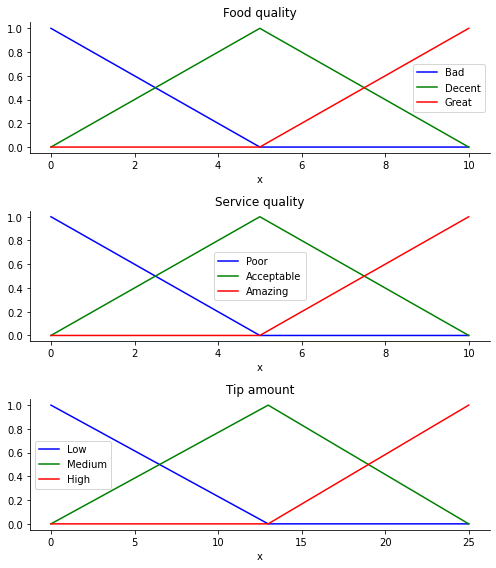

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(7, 8))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
ax0.set_xlabel('x')
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()
ax1.set_xlabel('x')
ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()
ax2.set_xlabel('x')
for ax in (ax0, ax1, ax2):
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
plt.tight_layout()

Kualitas makanan = 3 dan kualitas pelayanan = 7.5

In [ ]:
#triangular 1
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 3)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 3)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 3)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 7.5)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 7.5)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 7.5)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))
# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
tip_activation_trian = fuzz.interp_membership(x_tip, aggregated_trian, tip_trian)

Text(0.5, 1.0, 'Aggregated membership and result (line)')

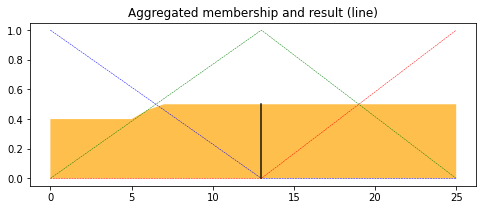

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

12.97083198794532


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

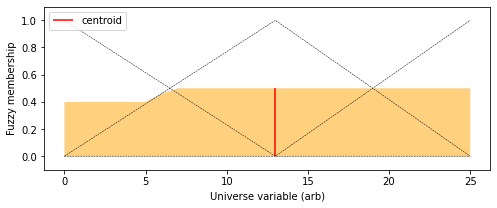

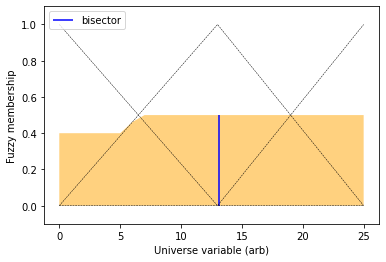

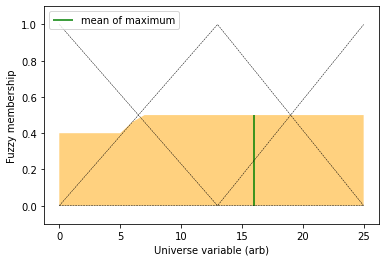

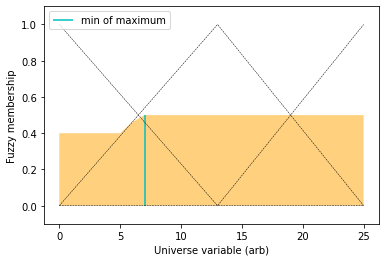

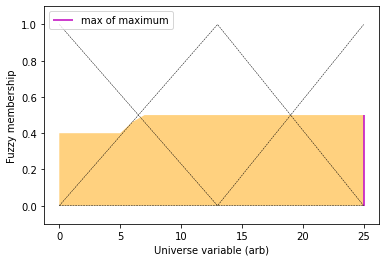

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()

In [ ]:
print('Tip defuzz_centroid: %8.4f'%defuzz_centroid,
 '\n Tip defuzz_bisector: %8.4f'%defuzz_bisector,
 '\n Tip defuzz_mom: %8.4f'%defuzz_mom,
 '\n Tip defuzz_som: %8.4f'%defuzz_som,
 '\n Tip defuzz_lom: %8.4f'%defuzz_lom)

Tip defuzz_centroid:  12.9708 
 Tip defuzz_bisector:  13.0885 
 Tip defuzz_mom:  16.0000 
 Tip defuzz_som:   7.0000 
 Tip defuzz_lom:  25.0000


Kualitas makanan = 8 dan kualitas pelayanan 5.5

In [ ]:
#triangular 2
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 8)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 8)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 8)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 5.5)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 5.5)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 5.5)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))
# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
tip_activation_trian = fuzz.interp_membership(x_tip, aggregated_trian, tip_trian)

Text(0.5, 1.0, 'Aggregated membership and result (line)')

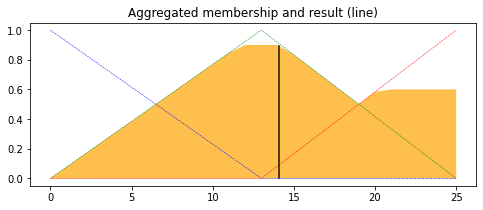

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

14.098156230515722


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

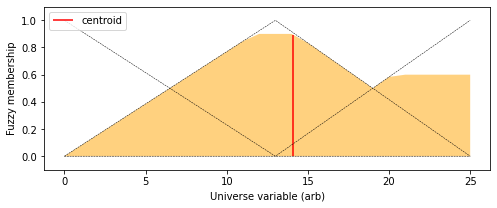

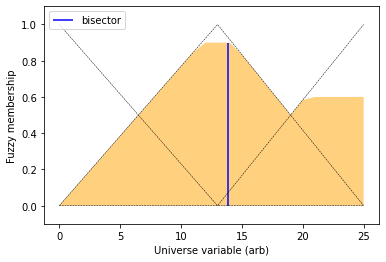

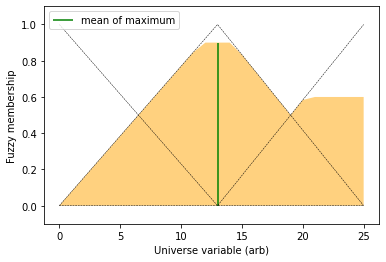

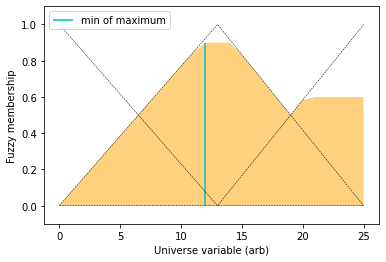

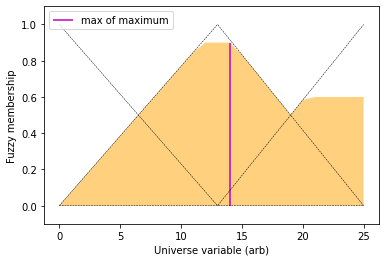

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()

In [ ]:
print('Tip defuzz_centroid: %8.4f'%defuzz_centroid,
 '\n Tip defuzz_bisector: %8.4f'%defuzz_bisector,
 '\n Tip defuzz_mom: %8.4f'%defuzz_mom,
 '\n Tip defuzz_som: %8.4f'%defuzz_som,
 '\n Tip defuzz_lom: %8.4f'%defuzz_lom)

Tip defuzz_centroid:  14.0982 
 Tip defuzz_bisector:  13.8554 
 Tip defuzz_mom:  13.0000 
 Tip defuzz_som:  12.0000 
 Tip defuzz_lom:  14.0000


Kualitas makanan = 6.6 dan kualitas pelayanan 6.6

In [ ]:
#triangular 3
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.6)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.6)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.6)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 6.6)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 6.6)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 6.6)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))
# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
tip_activation_trian = fuzz.interp_membership(x_tip, aggregated_trian, tip_trian)

Text(0.5, 1.0, 'Aggregated membership and result (line)')

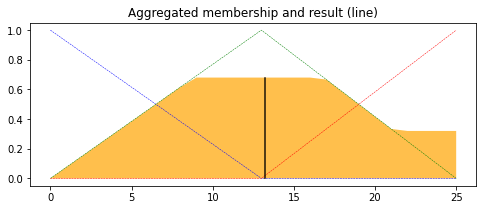

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

13.220271383361514


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

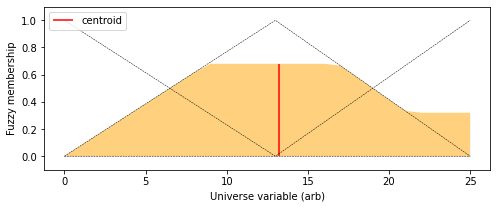

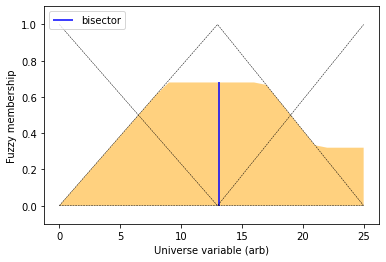

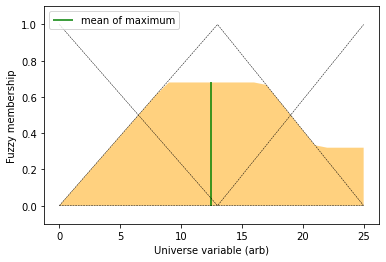

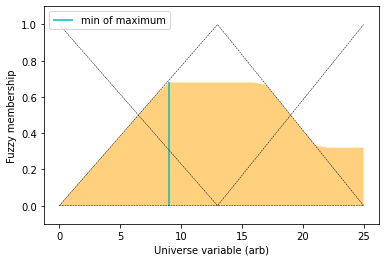

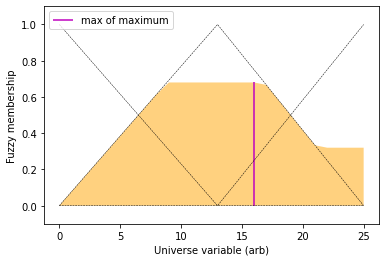

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()

In [ ]:
print('Tip defuzz_centroid: %8.4f'%defuzz_centroid,
 '\n Tip defuzz_bisector: %8.4f'%defuzz_bisector,
 '\n Tip defuzz_mom: %8.4f'%defuzz_mom,
 '\n Tip defuzz_som: %8.4f'%defuzz_som,
 '\n Tip defuzz_lom: %8.4f'%defuzz_lom)

Tip defuzz_centroid:  13.2203 
 Tip defuzz_bisector:  13.1256 
 Tip defuzz_mom:  12.5000 
 Tip defuzz_som:   9.0000 
 Tip defuzz_lom:  16.0000


Trapezoidal

In [ ]:
# Generate fuzzy Trapezoidal membership functions
qual_lo_trap = fuzz.trapmf(x_qual, [0, 0, a_x_qs-3, a_x_qs-1])
qual_md_trap = fuzz.trapmf(x_qual, [a_x_qs-3, a_x_qs-1, a_x_qs+1, (a_x_qs-1)*2])
qual_hi_trap = fuzz.trapmf(x_qual, [a_x_qs+1, (a_x_qs-1)*2, b_x_qs, b_x_qs])
serv_lo_trap = fuzz.trapmf(x_serv, [0, 0, a_x_qs-3, a_x_qs-1])
serv_md_trap = fuzz.trapmf(x_serv, [a_x_qs-3, a_x_qs-1, a_x_qs+1, (a_x_qs-1)*2])
serv_hi_trap = fuzz.trapmf(x_serv, [a_x_qs+1, (a_x_qs-1)*2, b_x_qs, b_x_qs])
tip_lo_trap = fuzz.trapmf(x_tip, [0, 0, a_x_qs-3, a_x_qs-1])
tip_md_trap = fuzz.trapmf(x_tip, [a_x_qs-3, a_x_qs-1, a_x_qs+1, (a_x_qs-1)*2])
tip_hi_trap = fuzz.trapmf(x_tip, [a_x_qs+1, (a_x_qs-1)*2, b_x_qs, b_x_qs])

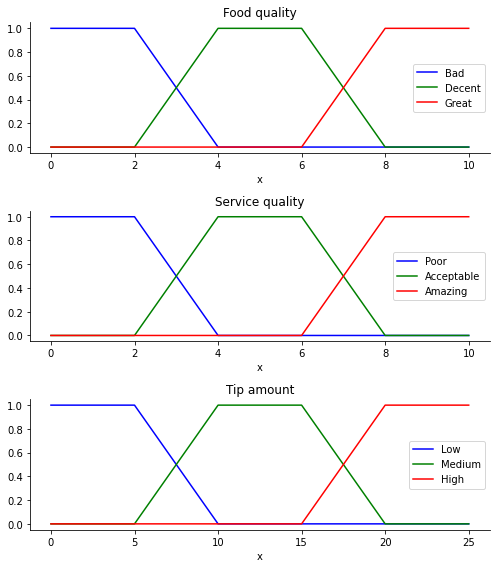

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(7, 8))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
ax0.set_xlabel('x')
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()
ax1.set_xlabel('x')
ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()
ax2.set_xlabel('x')
for ax in (ax0, ax1, ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  plt.tight_layout()

7.5 dan 6

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 7.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 7.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 7.5)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 6)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 6)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 6)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))

# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')

Text(0.5, 1.0, 'Aggregated membership and result (line)')

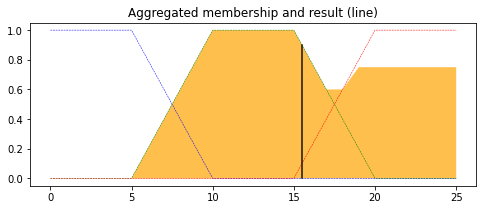

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
tip_activation_trian = fuzz.interp_membership(x_tip,aggregated_trian,tip_trian)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',
linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

15.515966386554622


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

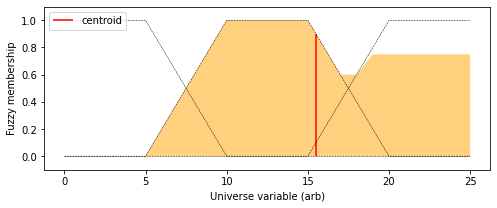

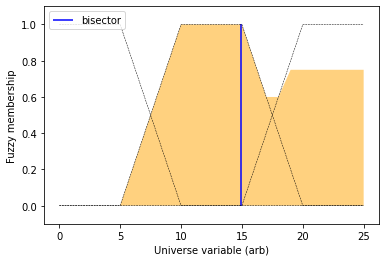

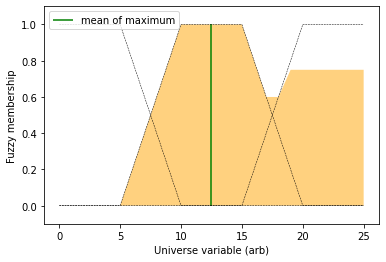

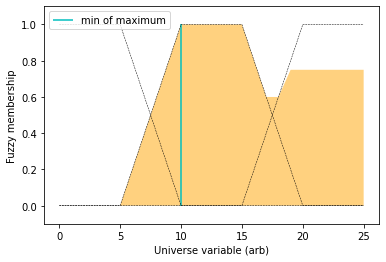

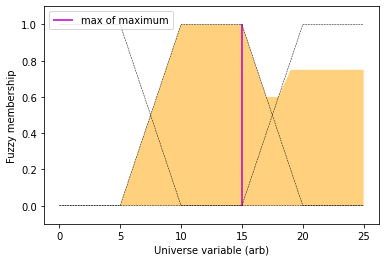

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()

In [ ]:
print('Tip defuzz_centroid: %8.4f'%defuzz_centroid,
'\n Tip defuzz_bisector: %8.4f'%defuzz_bisector,
'\n Tip defuzz_mom: %8.4f'%defuzz_mom,
'\n Tip defuzz_som: %8.4f'%defuzz_som,
'\n Tip defuzz_lom: %8.4f'%defuzz_lom)

Tip defuzz_centroid:  15.5160 
 Tip defuzz_bisector:  14.9375 
 Tip defuzz_mom:  12.5000 
 Tip defuzz_som:  10.0000 
 Tip defuzz_lom:  15.0000


8 dan 8

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 8)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 8)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 8)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 8)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))

# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')

Text(0.5, 1.0, 'Aggregated membership and result (line)')

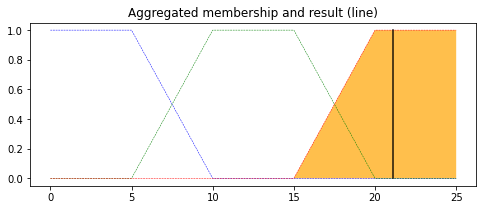

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
tip_activation_trian = fuzz.interp_membership(x_tip,aggregated_trian,tip_trian)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',
linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

21.111111111111107


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

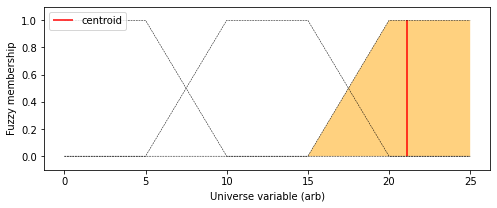

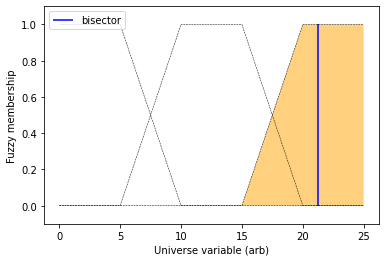

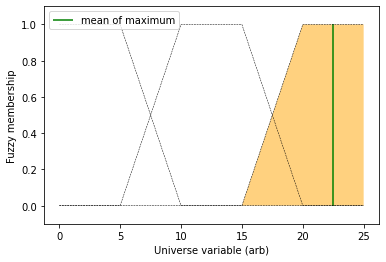

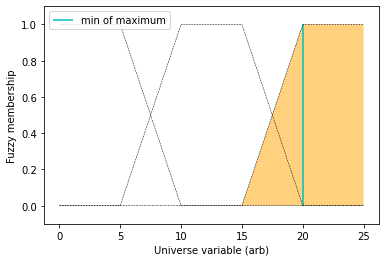

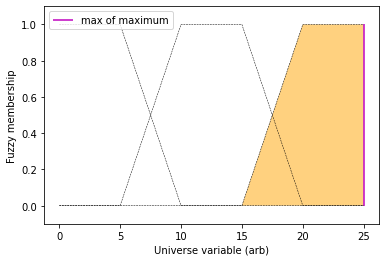

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()

In [ ]:
print('Tip defuzz_centroid: %8.4f'%defuzz_centroid,
'\n Tip defuzz_bisector: %8.4f'%defuzz_bisector,
'\n Tip defuzz_mom: %8.4f'%defuzz_mom,
'\n Tip defuzz_som: %8.4f'%defuzz_som,
'\n Tip defuzz_lom: %8.4f'%defuzz_lom)

Tip defuzz_centroid:  21.1111 
 Tip defuzz_bisector:  21.2500 
 Tip defuzz_mom:  22.5000 
 Tip defuzz_som:  20.0000 
 Tip defuzz_lom:  25.0000


3.5 dan 7

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 3.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 3.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 3.5)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 7)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 7)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 7)

In [ ]:
active_rule1_trian = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo_trian = np.fmin(active_rule1_trian, tip_lo)
tip_activation_md_trian = np.fmin(serv_level_md, tip_md)
active_rule3_trian = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi_trian = np.fmin(active_rule3_trian, tip_hi)
tip0_trian = np.zeros_like(x_tip)

In [ ]:
# Aggregate all three output membership functions together
aggregated_trian = np.fmax(tip_activation_lo_trian, np.fmax(tip_activation_md_trian, tip_activation_hi_trian))

# Calculate defuzzified result
tip_trian = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')

Text(0.5, 1.0, 'Aggregated membership and result (line)')

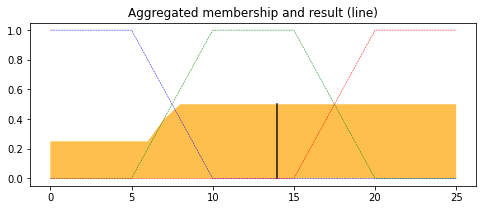

In [ ]:
# Visualize this Trian
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0_trian, aggregated_trian,
facecolor='Orange', alpha=0.7)
tip_activation_trian = fuzz.interp_membership(x_tip,aggregated_trian,tip_trian)
ax0.plot([tip_trian, tip_trian], [0, tip_activation_trian], 'k',
linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [ ]:
print(tip_trian)

13.945088940448567


In [ ]:
defuzz_centroid = fuzz.defuzz(x_tip, aggregated_trian, 'centroid')
# Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x_tip, aggregated_trian, 'bisector')
defuzz_mom = fuzz.defuzz(x_tip, aggregated_trian, 'mom')
defuzz_som = fuzz.defuzz(x_tip, aggregated_trian, 'som')
defuzz_lom = fuzz.defuzz(x_tip, aggregated_trian, 'lom')

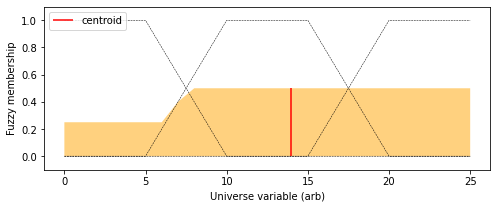

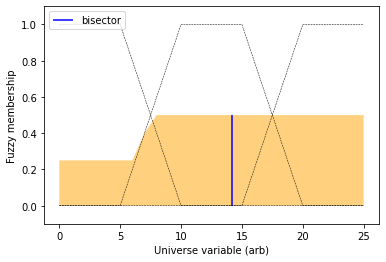

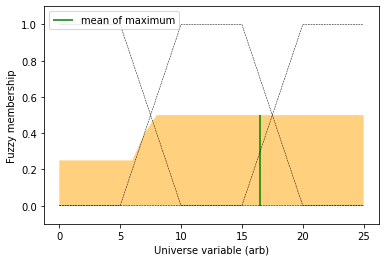

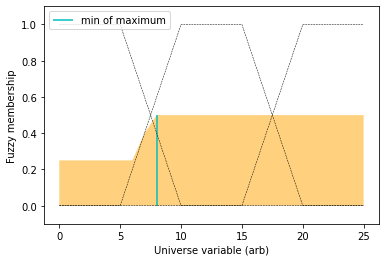

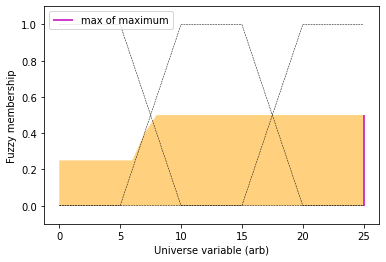

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, aggregated_trian, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 3))

#plt.plot(x_tip, aggregated_trian)
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
  plt.plot(x_tip, tip_lo, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_md, 'k', linewidth=0.5, linestyle='--')
  plt.plot(x_tip, tip_hi, 'k', linewidth=0.5, linestyle='--')
  plt.fill_between(x_tip, tip0_trian, aggregated_trian,
                   facecolor='Orange', alpha=0.5)
  plt.ylabel('Fuzzy membership')
  plt.xlabel('Universe variable (arb)')
  plt.ylim(-0.1, 1.1)
  plt.legend(loc=2)
  plt.show()